# Downloading the Data

In [1]:
import os
import urllib.request

project_folder = r"C:\MorozGY\!_Code\1_ML\Hands-on-machine-learning\3_TitanicDataset"
dataset_path = os.path.join(project_folder, "datasets")
download_URL = r"https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/titanic/"

In [2]:
def fetch_data(url=download_URL, path = dataset_path):
    if not os.path.isdir(path):
        os.mkdir(path)
    for filename in ("train.csv", "test.csv"):
        filepath = os.path.join(path, filename)
        if not os.path.isfile(filepath):
            print("Downloading {}".format(filename))
            urllib.request.urlretrieve(url + filename, filepath)

fetch_data()

# Reading the Data

In [3]:
import pandas as pd

def read_data(dataset_path = dataset_path):
    train_data_path = os.path.join(dataset_path, "train.csv")
    train_data = pd.read_csv(train_data_path)
    test_data_path = os.path.join(dataset_path, "test.csv")
    test_data = pd.read_csv(test_data_path)
    return train_data, test_data

train_data, test_data = read_data()

# Studying the Data

In [4]:
train_data = train_data.set_index("PassengerId")
test_data = test_data.set_index("PassengerId")

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
train_data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


<AxesSubplot:>

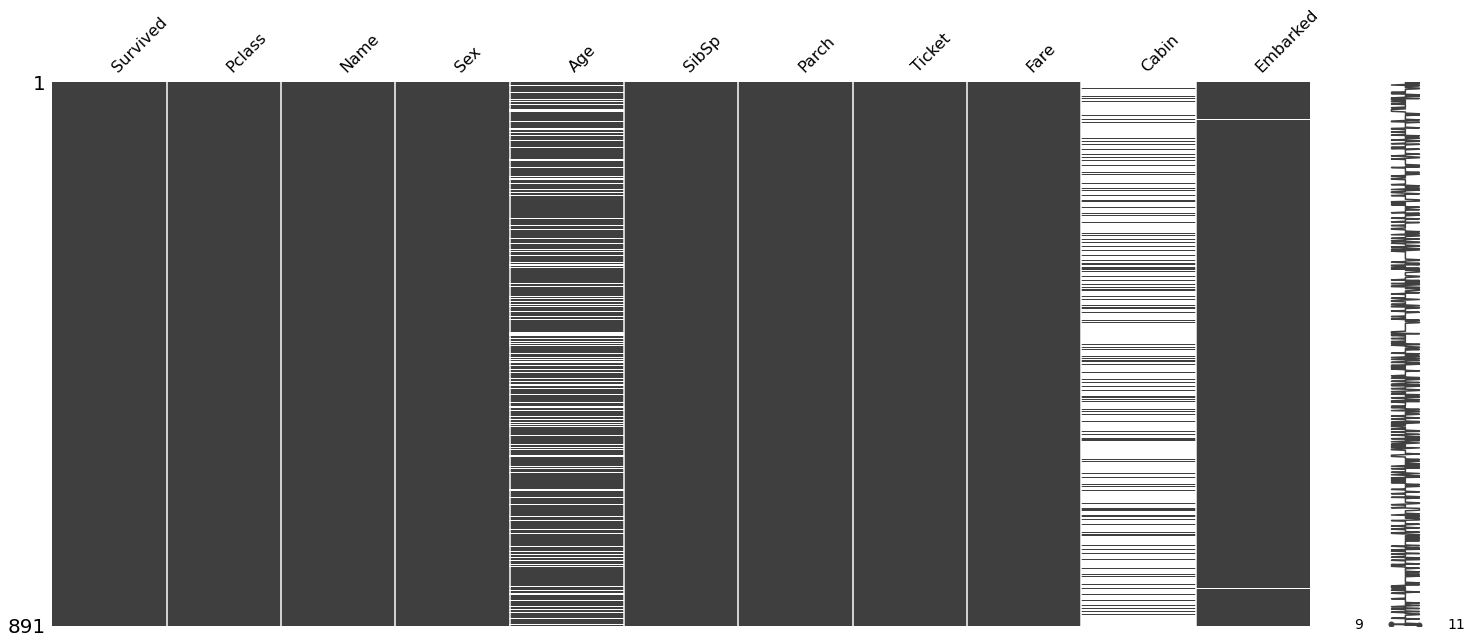

In [7]:
import missingno as msno

msno.matrix(train_data)

In [8]:
train_data_no_cab = train_data.drop("Cabin", axis = 1)

<AxesSubplot:>

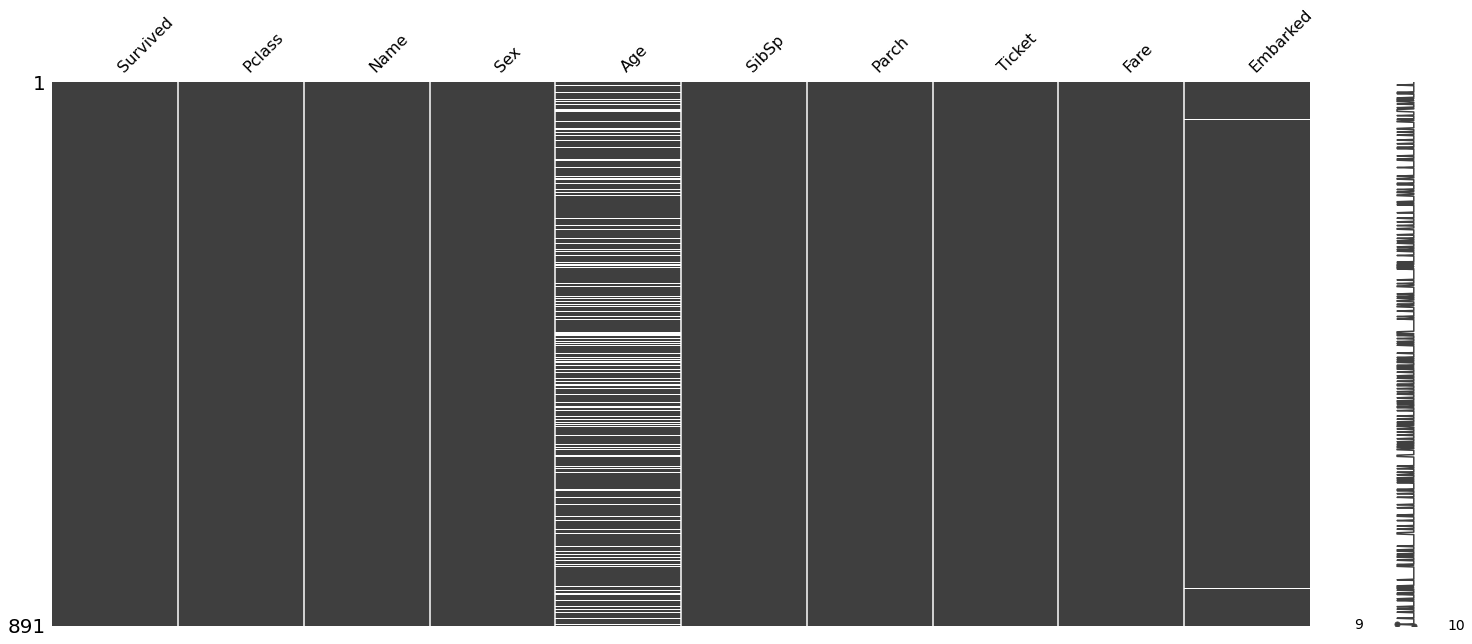

In [9]:
msno.matrix(train_data_no_cab)

In [10]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699113,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526507,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.416700,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
train_data["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [12]:
train_data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [13]:
train_data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

# Building preprocessing pipelines

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

### Pipeline for handling numerical values

In [15]:
num_pipeline = Pipeline([
            ("imputer", SimpleImputer(strategy = "median")),
            ("scaler", StandardScaler())
])

### Pipeline for handling categorical  values

In [16]:
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("cat_encoder", OneHotEncoder(sparse=False))
])

### Combining pipelines

In [17]:
from sklearn.compose import ColumnTransformer

In [18]:
num_attribs = ["Age", "SibSp", "Parch", "Fare"]
cat_attribs = ["Pclass", "Sex", "Embarked"]

preprocess_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs)
])

In [19]:
X_train = preprocess_pipeline.fit_transform(
    train_data[num_attribs + cat_attribs])

In [20]:
y_train = train_data["Survived"]

# Training an RandomForestClassifier

In [21]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier()

In [22]:
from sklearn.model_selection import GridSearchCV

parameters_grid = [
    {"n_estimators": [50, 100, 150, 200, 250],
     "max_depth": [2, 4, 8, 16, 32],
     "random_state": [42]
    }
]

grid_search = GridSearchCV(forest_clf, parameters_grid, cv=3, scoring = "accuracy")

grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [2, 4, 8, 16, 32],
                          'n_estimators': [50, 100, 150, 200, 250],
                          'random_state': [42]}],
             scoring='accuracy')

In [23]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=8, random_state=42)

In [24]:
estimation_model = grid_search.best_estimator_

In [25]:
X_test = preprocess_pipeline.transform(test_data[num_attribs + cat_attribs])

In [26]:
y_pred = estimation_model.predict(X_test)

In [27]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)

In [28]:
forest_scores.mean()

0.8081523096129839

# Training a SVClassifier

In [29]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto")
svm_scores = cross_val_score(svm_clf, X_train, y_train, cv=10)
svm_scores.mean()

0.8249313358302123

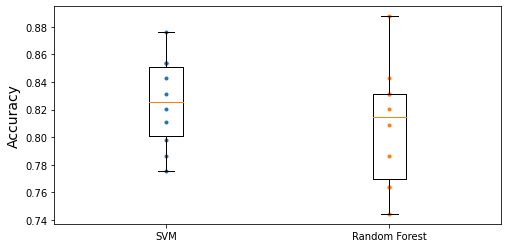

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot([1]*10, svm_scores, ".")
plt.plot([2]*10, forest_scores, ".")
plt.boxplot([svm_scores, forest_scores], labels=("SVM","Random Forest"))
plt.ylabel("Accuracy", fontsize=14)
plt.show()